In [15]:
import cv2
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
from matplotlib import pyplot as plt

In [6]:
import cv2
import numpy as np

img=cv2.imread('NoSunglasses0.jpg')
print(img.shape)
cv2.imshow('frame',img)

cv2.waitKey(0)

cv2.destroyAllWindows()

(120, 128, 3)


In [8]:
dataset=np.zeros(((313+311),120,128))
for i in range(0,312):
    a=cv2.imread(fr"C:\Users\shour\Desktop\Intermediate_Assignment_Dataset\NoSunglasses{i}.pgm")
    #cv2.imwrite(fr"C:\Users\shour\Desktop\Intermediate_Assignment_Dataset_jpg\NoSunglasses{i}.jpg", a)
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    dataset[i]=a
for j in range(0,310):
    a=cv2.imread(fr"C:\Users\shour\Desktop\Intermediate_Assignment_Dataset\YesSunglasses{j}.pgm")
    #cv2.imwrite(fr"C:\Users\shour\Desktop\Intermediate_Assignment_Dataset_jpg\YesSunglasses{j}.jpg", a)
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    dataset[313 +j ]=a

In [11]:
dataset = dataset.astype(np.uint8)

In [12]:
dataset.shape

(624, 120, 128)

In [13]:
labels = np.array([0]*313+[1]*311).reshape((624,1))

In [14]:
labels.shape

(624, 1)

[0]


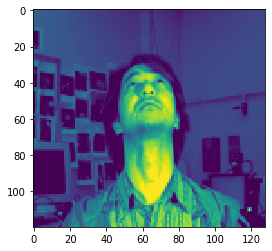

In [18]:
import matplotlib.pyplot as plt
i = np.random.randint(1, 600)
plt.imshow(dataset[i])
print(labels[i])

In [19]:
train_images = dataset
train_labels = labels

In [20]:
train_images=train_images/255

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.1,shuffle=True)

In [22]:
X_train.shape

(561, 120, 128)

In [23]:
train_images = X_train
train_labels = y_train

C:\Users\shour\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


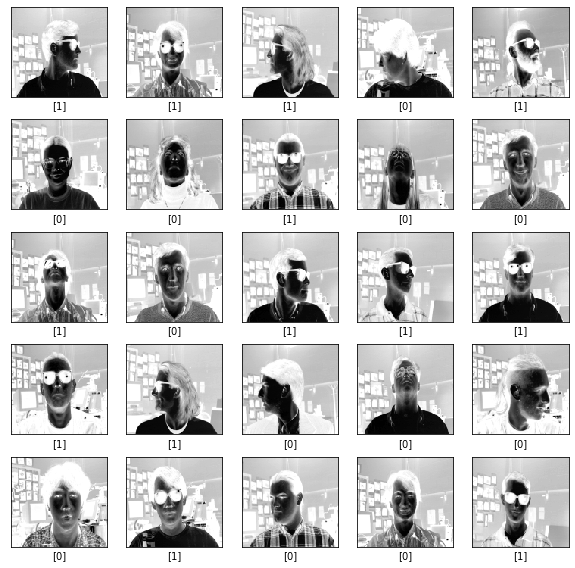

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [25]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(600, activation='relu'),
  keras.layers.Dense(300, activation='relu'),
  keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
18/18 [==============================] - 1s 46ms/step - loss: 2.7963 - accuracy: 0.5045
Epoch 2/5
18/18 [==============================] - 1s 45ms/step - loss: 0.5720 - accuracy: 0.7184
Epoch 3/5
18/18 [==============================] - 1s 47ms/step - loss: 0.4392 - accuracy: 0.7968
Epoch 4/5
18/18 [==============================] - 1s 46ms/step - loss: 0.4301 - accuracy: 0.8093
Epoch 5/5
18/18 [==============================] - 1s 46ms/step - loss: 0.3900 - accuracy: 0.8146


In [27]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4153 - accuracy: 0.8254


[0.4152790904045105, 0.8253968358039856]